# Function Explorer — Milestone 1 (MVP)
This notebook delivers the MVP:
1) `sympy.sympify` to parse a function string  
2) `lambdify` to create a NumPy-callable  
3) Plot over a chosen interval

> Dependencies: `sympy`, `numpy`, `matplotlib`

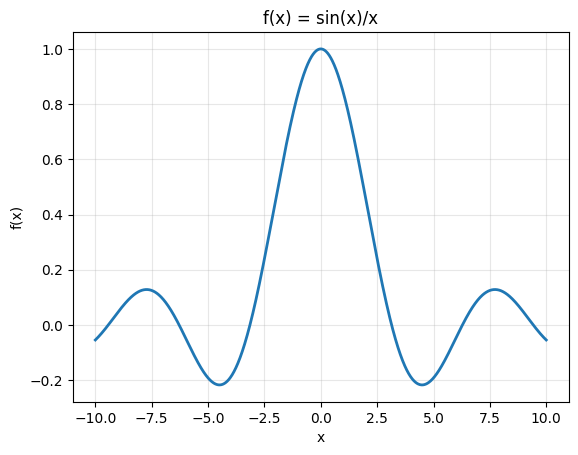

In [1]:

# function_explorer_mvp.py
# Milestone 1 (MVP): parse -> lambdify -> plot
#
# Usage example (from a Python session):
#   from function_explorer_mvp import plot_expression
#   plot_expression("sin(x)/x", x_min=-10, x_max=10)
#
# Notes:
# - Real-valued plotting only; complex results are masked.
# - Handles divisions by zero and NaNs via masking.
# - Minimal dependencies: sympy, numpy, matplotlib

from typing import Callable, Tuple
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def build_callable(expr_str: str) -> Tuple[sp.Symbol, sp.Expr, Callable]:
    '''Parse an expression string into a SymPy Expr and return a NumPy-callable.
    
    Parameters
    ----------
    expr_str : str
        A mathematical expression in terms of x (e.g., "sin(x)/x", "x**2 + 3*x - 1").
    
    Returns
    -------
    x : sp.Symbol
        The symbol assumed to be the independent variable.
    expr : sp.Expr
        The parsed SymPy expression.
    f_np : Callable
        A NumPy-vectorized function f(x) suitable for plotting.
    '''
    x = sp.Symbol("x", real=True)
    # Safe parse: use sympy's default transformations; no eval of Python code
    expr = sp.sympify(expr_str, locals={
        # Add common functions for convenience; sympy recognizes many by default
        "sin": sp.sin, "cos": sp.cos, "tan": sp.tan, "exp": sp.exp, "log": sp.log,
        "sqrt": sp.sqrt, "abs": sp.Abs
    })
    # lambdify -> NumPy-aware callable
    f_np = sp.lambdify(x, expr, modules=["numpy"])
    return x, expr, f_np

def plot_expression(expr_str: str, x_min: float=-10.0, x_max: float=10.0, samples: int=1000) -> None:
    '''Plot a user-specified function over [x_min, x_max].
    
    Steps (Milestone 1):
    1) Parse expression via sympy.sympify
    2) Convert to NumPy function via lambdify
    3) Plot on a chosen interval
    
    Parameters
    ----------
    expr_str : str
        Expression in terms of x.
    x_min, x_max : float
        Plot interval.
    samples : int
        Number of points to sample.
    '''
    if x_max <= x_min:
        raise ValueError("x_max must be greater than x_min.")
    if samples < 2:
        raise ValueError("samples must be >= 2.")
    
    _, expr, f_np = build_callable(expr_str)
    xs = np.linspace(x_min, x_max, samples)
    ys = f_np(xs)
    
    # Mask non-real / invalid values to keep the MVP robust
    ys = np.array(ys, dtype=np.complex128)
    # Keep only real parts where imaginary part is ~0
    real_mask = np.isfinite(ys.real) & (np.abs(ys.imag) < 1e-12)
    y_real = np.where(real_mask, ys.real, np.nan)
    
    plt.figure()
    plt.plot(xs, y_real, linewidth=2)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title(f"f(x) = {sp.sstr(expr)}")
    plt.grid(True, alpha=0.3)
    plt.show()

if __name__ == "__main__":
    # Demo
    plot_expression("sin(x)/x", -10, 10, 1200)


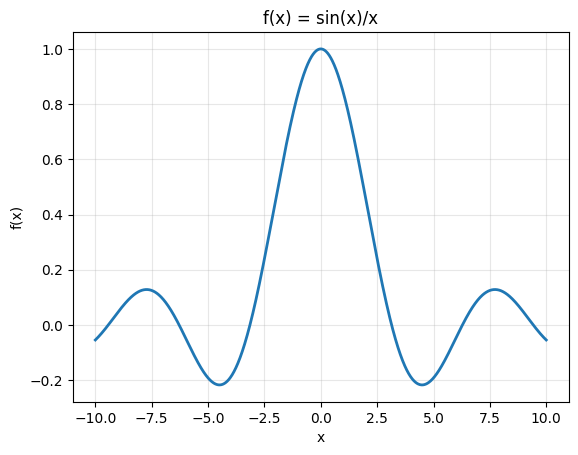

In [2]:
# Demo: adjust the expression / interval as needed
from function_explorer_mvp import plot_expression
plot_expression("sin(x)/x", x_min=-10, x_max=10, samples=1200)